In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

In [22]:
# Datasets:
# Original:

with open('/Users/francisco/Public/log_file_original.log', encoding='utf-8') as f:
    ori = " ".join(line.strip() for line in f)

# Split the string on the curly braces
ori = re.findall(r'\{[^}]*\}', ori)
ori = [ast.literal_eval(item) for item in ori]

# # Evolved:

# with open('/Users/francisco/Public/log_file_evolved.log', encoding='utf-8') as f:
#     evo = " ".join(line.strip() for line in f)

# # Split the string on the curly braces
# evo = re.findall(r'\{[^}]*\}', evo)
# evo = [ast.literal_eval(item) for item in evo]

# # Simple:

# with open('/Users/francisco/Public/log_file_simple.log', encoding='utf-8') as f:
#     sim = " ".join(line.strip() for line in f)

# # Split the string on the curly braces
# sim = re.findall(r'\{[^}]*\}', sim)
# sim = [ast.literal_eval(item) for item in sim]


# # Random:

# with open('/Users/francisco/Public/log_file_random.log', encoding='utf-8') as f:
#     ran = " ".join(line.strip() for line in f)

# # Split the string on the curly braces
# ran = re.findall(r'\{[^}]*\}', ran)
# ran = [ast.literal_eval(item) for item in ran]


In [23]:
def relevant_data_to_df(text_file):
    # Transform list to pandas df:
    df = pd.DataFrame(text_file)
    # Filter out WARNING messages:
    df = df[df['levelname'] != 'WARNING'].reset_index(drop=True)
    # Expand remaining levelname messages INFO, CRITICAL
    df = pd.get_dummies(df, columns=['levelname'])
    # Calculate cumulative sum of INFO, CRITICAL events
    df['accum_INFO'] = df['levelname_INFO'].cumsum()
    try:
        df['accum_CRITICAL'] = df['levelname_CRITICAL'].cumsum()
    except KeyError:
        df['accum_CRITICAL'] = 0
        df['levelname_CRITICAL'] = 0
    df['loaded_evens'] = list(range(1, df.shape[0]+1))
    df['success_rate'] = df['accum_INFO'] / df['loaded_evens']
    
    return df

def plot_df(df,ax, dataset_name):
    ax.plot(df.index, df['accum_INFO'],label='Successfully loaded events')
    ax.plot(df.index, df['accum_CRITICAL'],label='Failed to load events')
    ini_time = df.time[0]
    end_time = df.time[df.shape[0]-1]
    loading_time = round((pd.to_datetime(end_time) - pd.to_datetime(ini_time)).total_seconds()/3600,1)
    ax.set_title(f'{dataset_name} dataset \n start: {ini_time} \n end: {end_time} \n total loading time: {loading_time} hrs.')
    ax.set_xlabel('Number of Events')
    ax.set_ylabel('Number of Events')
    ax.legend()

    return ax

In [24]:
df = pd.DataFrame(ori)

In [25]:
df = df[df['levelname'] != 'WARNING'].reset_index(drop=True)

In [26]:
df = pd.get_dummies(df, columns=['levelname'])

In [14]:
df['accum_INFO'] = df['levelname_INFO'].cumsum()

In [27]:
ori = relevant_data_to_df(ori)
# evo = relevant_data_to_df(evo)
# sim = relevant_data_to_df(sim)
# ran = relevant_data_to_df(ran)

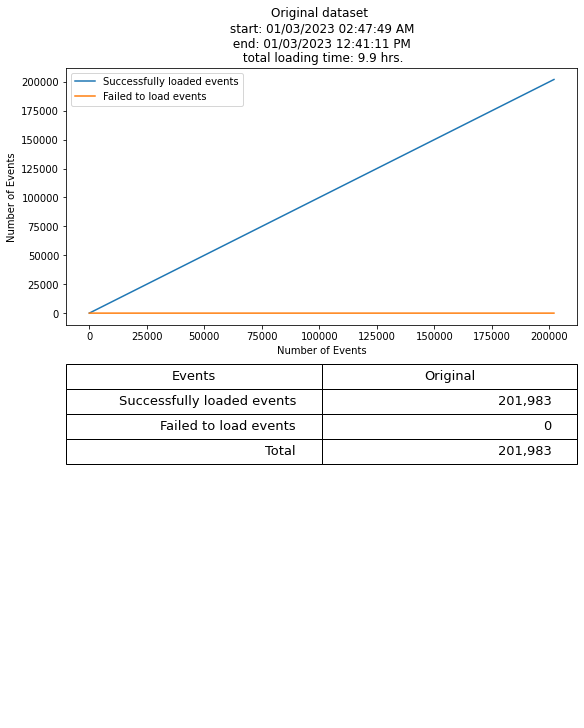

In [33]:
fig = plt.figure(figsize=(8, 10), layout="constrained")
spec = fig.add_gridspec(2, 1)

ax1 = fig.add_subplot(spec[0,0])
ax1 = plot_df(ori, ax1, 'Original')

# ax2 = fig.add_subplot(spec[0,1])
# ax2 = plot_df(evo, ax2, 'Evolved')

# ax3 = fig.add_subplot(spec[0,2])
# ax3 = plot_df(sim, ax3, 'Simple')

# ax4 = fig.add_subplot(spec[0,3])
# ax4 = plot_df(ran, ax4, 'Random')

ax5 = fig.add_subplot(spec[1, :])
table = ax5.table(cellText=[['Successfully loaded events', 
                    '{:,.0f}'.format(ori['levelname_INFO'].sum())],
                    # '{:,.0f}'.format(evo['levelname_INFO'].sum()),
                    # '{:,.0f}'.format(sim['levelname_INFO'].sum()),
                    # '{:,.0f}'.format(ran['levelname_INFO'].sum())],
                    ['Failed to load events', 
                    '{:,.0f}'.format(ori['levelname_CRITICAL'].sum())],
                    # '{:,.0f}'.format(evo['levelname_CRITICAL'].sum()),
                    # '{:,.0f}'.format(sim['levelname_CRITICAL'].sum()),
                    # '{:,.0f}'.format(ran['levelname_CRITICAL'].sum())],
                    ['Total', 
                    '{:,.0f}'.format(len(ori)),]],
                    # '{:,.0f}'.format(len(evo)),
                    # '{:,.0f}'.format(len(sim)),
                    # '{:,.0f}'.format(len(ran))]],
                colLabels=['Events', 'Original'],#, 'Evolved', 'Simple', 'Random'],
                loc='top')
table.set_fontsize(14)
table.scale(1, 2)
ax5.axis('off')
plt.show()